<div style="display:block; margin-bottom:50px">
<h1 style="margin-bottom:25px; font-size:3.5rem;color:#4c76ce;text-align:center;">
    Statistics with Python</h1>
    
<h2 style="margin-bottom: 25px;font-size:2.5rem;text-align:center;">
    Introduction to Hypothesis Testing</h2>
       
<img src="https://raw.githubusercontent.com/alv2017/StatisticsWithPython/master/Images/statistics.png"
     style="position:absolute;top:10px;left:45px;height:150px;width:auto;margin-bottom:35px;">
</div>


The hypothesis testing procedure uses data from a sample to test two competing statements H<sub>0</sub> and H<sub>1</sub>.

In hypothesis testing we begin by making a tentative assumption about a population parameter. This tentative assumption is called the null hypothesis and is denoted by H<sub>0</sub>. We then define another hypothesis, called an alternative hypothesis, which is opposite of what is stated in the null hypothesis. The alternative hypothesis is denoted by H<sub>1</sub>.


## Forms of Null and Alternative Hypothesis

#### Lower Tail Test:

$H_{0}: \mu \ge  \mu_{0}, \quad \\
H_{1}: \mu < \mu_{0}
$

#### Two-Taile Test:

$
H_{0}: \mu =  \mu_{0}, \quad \\
H_{1}: \mu \ne \mu_{0}
$

#### Upper Tail Test:

$
H_{0}: \mu \le  \mu_{0}, \quad \\
H_{1}: \mu > \mu_{0}
$

## Hypothesis Testing Workflow

1. Draw a random sample from a population.

2. Formulate a null hypothesis.

3. Calculate a test statistics.

4. Find a *p-value*.

5. If a *p-value* is lower than a selected levele of significance, then reject H<sub>0</sub>.



The *p-value* states how likely is to obtain a value as extreme or more extreme by chance alone, if the null hypothesis is true. The value against which the *p-value* is compared is called the level of significance, and it is often indicated with the greek letter $\alpha$. It is a common practice to set the level of significance $\alpha$ to *0.95*.

## Type I and Type II Errors

The null and alternative hypotheses are competing statements abouth the population. Either the null hypothesis H<sub>0</sub> is true or the alternative hypothesis H<sub>1</sub> is true, but not both. Ideally the hypothesis testing procedure should lead to the acceptance of H<sub>0</sub> when H<sub>0</sub> is true and to the rejection of H<sub>0</sub> when H<sub>1</sub> is true. Unfortunately, the correct conclusion is not always possible. The hypothesis tests are based on sample information, and we must allow for the possibility of errors. The table below illustrates the two kinds of errors that can be made in hypothesis testing.



<table style="border: 1px solid black;font-size:14px;">
    <tr>
        <th>Conclusion</th>
        <th>H0 is true</th>
        <th>H1 is true</th>
    </tr>
    <tr style="border: 1px solid black;">
        <td style="text-align:left">Accept H0</td>
        <td style="text-align:left">Correct</td>
        <td style="text-align:left">Type II error</td>
    </tr>
    <tr style="border: 1px solid black;">
        <td style="text-align:left">Reject H0</td>
        <td style="text-align:left">Type I error</td>
        <td style="text-align:left">Correct</td>
    </tr>
</table>

- We get a *Type I error*, when H<sub>0</sub> is true and it gets rejected. *Type I error* is called sometimes a *producer risk*, because a production item gets rejected, even though it meets regulatory requirements.


- We get a *Type II error* when H<sub>0</sub> is false and it is not get rejected. The *Type II error* is sometimes called *consumer risk*, because the consumer obtains an item that doesn't meet the requirements.


- The probability for the *Type II error* is commonly indicated with $\beta$. 


## Visualization: Power of a Statistical Test

The **power of a statistical test** is defined as $(1-\beta)$, and it represents the probability of correctly accepting the alternative hypothesis. The plot bellow demonstrates this concept.


In [1]:
import numpy as np
from scipy import stats

from bokeh.io.export import export_png
from bokeh.plotting import figure, output_notebook, show
from bokeh.models import Arrow, Label, VArea, VeeHead
from IPython.display import Image, display

output_notebook()

# Set to False in order to enable plots interactivity
DISPLAY_PLOT_AS_IMAGE = True

# Data

x = np.linspace(-7, 12, num=250)

## Process 01
mu01 = 0
sigma01 = 2
proc01 = stats.norm(loc=mu01, scale=sigma01)
y01 = proc01.pdf(x)

## Critical Areas
xc1_left = np.linspace(-7, -4, num=100)
yc1_lower_left = 0 * xc1_left
yc1_upper_left = proc01.pdf(xc1_left)

xc1_right = np.linspace(4, 12, num=100)
yc1_lower_right = 0 * xc1_right
yc1_upper_right = proc01.pdf(xc1_right)


## Process 02
mu02 = 5
sigma02 = 2
proc02 = stats.norm(loc=mu02, scale=sigma02)
y02 = proc02.pdf(x)


Loading BokehJS ...

In [2]:
# Color Palette
COLORS = {
    "DARKBLUE": "#0E3663",
    "BLUE": "#5978A9",
    "DARKGREEN": "#0B5D37",
    "GREEN": "#6CA589",
    "GRAY": "#B3B3BD",
    "PINK": "#F78A8F",
    "PURPLE": "#D1829B"
}

# Plot
plt = figure(height=400, width=800, tools="")

## Plot Title
TITLE = "\nPower of a Statistical Test\n"
plt.title.text = TITLE
plt.title.text_font_size = "25px"
plt.title.text_font_style = "normal"
plt.title.text_color = COLORS["DARKBLUE"]
plt.title.align = "center"


# X-axis
plt.xaxis.axis_label = "Some Population Parameter"
plt.xaxis.axis_line_width = 3
plt.xaxis.axis_line_color = COLORS["DARKGREEN"]

# Left Tail
plt.varea(
    x=xc1_left,
    y1=yc1_lower_left,
    y2=yc1_upper_left,
    fill_color=COLORS["BLUE"],
    fill_alpha=0.7
)

# Right Tail
plt.varea(
    x=xc1_right,
    y1=yc1_lower_right,
    y2=yc1_upper_right,
    fill_color=COLORS["BLUE"],
    fill_alpha=0.7
)

# Power
plt.varea(
    x=xc1_right,
    y1=proc02.pdf(xc1_right),
    y2=proc01.pdf(xc1_right),
    fill_color=COLORS["PURPLE"],
    fill_alpha=0.7
)

# Distributions
plt.line(x, y01, line_width=2, color=COLORS["DARKBLUE"])
plt.line(x, y02, line_width=2, color=COLORS["DARKBLUE"])

# Mean Values
plt.scatter(mu01, 0, marker="triangle", size=10, color=COLORS["DARKGREEN"])
plt.scatter(mu02, 0, marker="triangle", size=10, color=COLORS["DARKGREEN"])

# Labels and Arrows
power_test_label = Label(x=8, y=0.12, x_units='data', y_units='data',
                 text=f"Power of Test=(1-\u03B2)", render_mode='css',
                 background_fill_color='white', background_fill_alpha=1.0)

power_test_arrow = Arrow(
    end=VeeHead(line_color=COLORS["GREEN"], line_width=1), 
    line_color=COLORS["GREEN"],
    x_start=8, y_start=0.12, x_end=6, y_end=0.05)


type_one_error_label = Label(x=-6, y=0.10, x_units='data', y_units='data',
                 text=f"Chance of\nType I Error", render_mode='css',
                 background_fill_color='white', background_fill_alpha=1.0)

type_one_error_arrow = Arrow(
    end=VeeHead(line_color=COLORS["GREEN"], line_width=1), 
    line_color=COLORS["GREEN"],
    x_start=-6, y_start=0.1, x_end=-4.5, y_end=0.005)


plt.add_layout(power_test_label)
plt.add_layout(power_test_arrow)
plt.add_layout(type_one_error_label)
plt.add_layout(type_one_error_arrow)


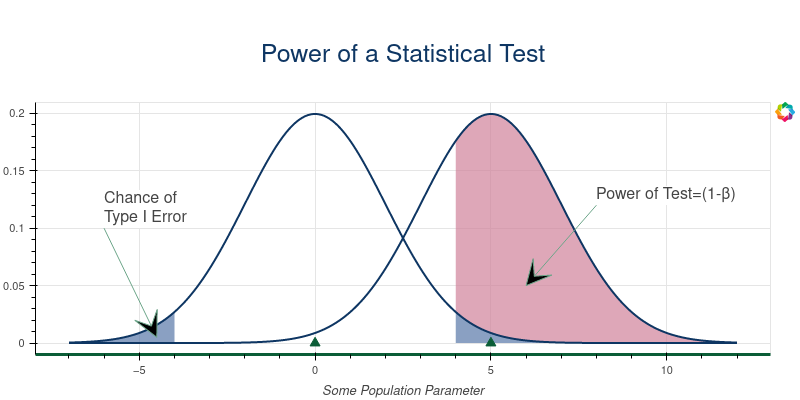

In [3]:
# Displaying the Plot

if DISPLAY_PLOT_AS_IMAGE:
    # Export image file
    img = "../Plots/power_of_statistical_test.png"
    img_file = export_png(plt, filename=img)
    
    # Display image
    display(Image(filename=img))
else:
    show(plt)